In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
file_path = "./Resources/GlobalLandTemperaturesByState.csv"
global_temp_df = pd.read_csv(file_path)
global_temp_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
# cast to to datetime
dt= lambda df_: pd.to_datetime(df_['dt'])

In [4]:
# Extract average Temp across the world since the begining of the 1900
global_temp_df = global_temp_df.loc[(global_temp_df['dt'] >= '1900-01-01')]
global_temp_df


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
536,1900-01-01,25.732,1.080,Acre,Brazil
537,1900-02-01,26.050,1.080,Acre,Brazil
538,1900-03-01,26.574,0.894,Acre,Brazil
539,1900-04-01,25.947,1.192,Acre,Brazil
540,1900-05-01,25.557,0.856,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [5]:
# drop the null values
cleanglobal_temp_df = global_temp_df.dropna()
cleanglobal_temp_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
536,1900-01-01,25.732,1.080,Acre,Brazil
537,1900-02-01,26.050,1.080,Acre,Brazil
538,1900-03-01,26.574,0.894,Acre,Brazil
539,1900-04-01,25.947,1.192,Acre,Brazil
540,1900-05-01,25.557,0.856,Acre,Brazil


In [6]:
# Make a copy of the data for future use
copy = cleanglobal_temp_df.copy()
# check the unique coloumn
cleanglobal_temp_df.nunique()


dt                                1365
AverageTemperature               78730
AverageTemperatureUncertainty     3089
State                              241
Country                              7
dtype: int64

In [7]:
cleanglobal_temp_df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [8]:
cleanglobal_temp_df.notnull().sum()


dt                               328784
AverageTemperature               328784
AverageTemperatureUncertainty    328784
State                            328784
Country                          328784
dtype: int64

In [9]:
# Recode the Columns
cleanglobal_temp_df = cleanglobal_temp_df.rename(columns={"dt":"Date",
                                                  "AverageTemperature":"Avg_temp",
                                                  "AverageTemperatureUncertainty":"Avg_temp_Uncer",
                                                  "State":"State",
                                                  "Country":"Country"})
cleanglobal_temp_df


,Date,Avg_temp,Avg_temp_Uncer,State,Country
536,1900-01-01,25.732,1.080,Acre,Brazil
537,1900-02-01,26.050,1.080,Acre,Brazil
538,1900-03-01,26.574,0.894,Acre,Brazil
539,1900-04-01,25.947,1.192,Acre,Brazil
540,1900-05-01,25.557,0.856,Acre,Brazil
...,...,...,...,...,...
645669,2013-04-01,15.710,0.461,Zhejiang,China
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China


In [10]:
# Format the columns.
cleanglobal_temp_df["Avg_temp"] = cleanglobal_temp_df["Avg_temp"].map("{:.2f}".format)
cleanglobal_temp_df["Avg_temp_Uncer"] = cleanglobal_temp_df["Avg_temp_Uncer"].map("{:.2f}".format)
cleanglobal_temp_df

,Date,Avg_temp,Avg_temp_Uncer,State,Country
536,1900-01-01,25.73,1.08,Acre,Brazil
537,1900-02-01,26.05,1.08,Acre,Brazil
538,1900-03-01,26.57,0.89,Acre,Brazil
539,1900-04-01,25.95,1.19,Acre,Brazil
540,1900-05-01,25.56,0.86,Acre,Brazil
...,...,...,...,...,...
645669,2013-04-01,15.71,0.46,Zhejiang,China
645670,2013-05-01,21.63,0.58,Zhejiang,China
645671,2013-06-01,24.68,0.60,Zhejiang,China
645672,2013-07-01,29.27,1.34,Zhejiang,China


In [11]:
cleanglobal_temp_df.reset_index(drop=True,inplace= True)
cleanglobal_temp_df

,Date,Avg_temp,Avg_temp_Uncer,State,Country
0,1900-01-01,25.73,1.08,Acre,Brazil
1,1900-02-01,26.05,1.08,Acre,Brazil
2,1900-03-01,26.57,0.89,Acre,Brazil
3,1900-04-01,25.95,1.19,Acre,Brazil
4,1900-05-01,25.56,0.86,Acre,Brazil
...,...,...,...,...,...
328779,2013-04-01,15.71,0.46,Zhejiang,China
328780,2013-05-01,21.63,0.58,Zhejiang,China
328781,2013-06-01,24.68,0.60,Zhejiang,China
328782,2013-07-01,29.27,1.34,Zhejiang,China


In [12]:

copy['Date'] = pd.to_datetime(copy.dt)
copy['Year'] = copy['Date'].dt.year
Global_temp =copy.reset_index()

In [13]:
Global_temp

,index,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,536,1900-01-01,25.732,1.080,Acre,Brazil,1900-01-01,1900
1,537,1900-02-01,26.050,1.080,Acre,Brazil,1900-02-01,1900
2,538,1900-03-01,26.574,0.894,Acre,Brazil,1900-03-01,1900
3,539,1900-04-01,25.947,1.192,Acre,Brazil,1900-04-01,1900
4,540,1900-05-01,25.557,0.856,Acre,Brazil,1900-05-01,1900
...,...,...,...,...,...,...,...,...
328779,645669,2013-04-01,15.710,0.461,Zhejiang,China,2013-04-01,2013
328780,645670,2013-05-01,21.634,0.578,Zhejiang,China,2013-05-01,2013
328781,645671,2013-06-01,24.679,0.596,Zhejiang,China,2013-06-01,2013
328782,645672,2013-07-01,29.272,1.340,Zhejiang,China,2013-07-01,2013


In [14]:
Global_temp.drop(columns = ['dt'], axis = 1, inplace = True)
Global_temp

,index,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,536,25.732,1.080,Acre,Brazil,1900-01-01,1900
1,537,26.050,1.080,Acre,Brazil,1900-02-01,1900
2,538,26.574,0.894,Acre,Brazil,1900-03-01,1900
3,539,25.947,1.192,Acre,Brazil,1900-04-01,1900
4,540,25.557,0.856,Acre,Brazil,1900-05-01,1900
...,...,...,...,...,...,...,...
328779,645669,15.710,0.461,Zhejiang,China,2013-04-01,2013
328780,645670,21.634,0.578,Zhejiang,China,2013-05-01,2013
328781,645671,24.679,0.596,Zhejiang,China,2013-06-01,2013
328782,645672,29.272,1.340,Zhejiang,China,2013-07-01,2013


In [15]:
Global_temp.drop(columns = ['index'], axis = 1, inplace = True)
Global_temp

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,25.732,1.080,Acre,Brazil,1900-01-01,1900
1,26.050,1.080,Acre,Brazil,1900-02-01,1900
2,26.574,0.894,Acre,Brazil,1900-03-01,1900
3,25.947,1.192,Acre,Brazil,1900-04-01,1900
4,25.557,0.856,Acre,Brazil,1900-05-01,1900
...,...,...,...,...,...,...
328779,15.710,0.461,Zhejiang,China,2013-04-01,2013
328780,21.634,0.578,Zhejiang,China,2013-05-01,2013
328781,24.679,0.596,Zhejiang,China,2013-06-01,2013
328782,29.272,1.340,Zhejiang,China,2013-07-01,2013


In [16]:
worldtemp_df = Global_temp.copy()

In [17]:
# # Save in the Resources
# Global_temp.to_csv(index=True)
# filepath = Path('Resources/Global_temp.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# Global_temp.to_csv(filepath)


In [18]:
Global_temp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,328784.0,9.767931,13.931064,-45.389,0.399,12.196,20.91625,36.339
AverageTemperatureUncertainty,328784.0,0.417751,0.319615,0.036,0.238,0.330,0.48600,7.638
Year,328784.0,1956.344652,32.819143,1900.000,1928.000,1956.000,1985.00000,2013.000


In [19]:
world_temp_byCountry = Global_temp.groupby(by='Country')[['AverageTemperature',
                                             'AverageTemperatureUncertainty']].agg(lambda x: x.astype(float).mean())


In [20]:
world_temp_byCountry

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Australia,17.996412,0.289294
Brazil,24.074648,0.535003
Canada,-1.364440,0.488840
China,11.707587,0.437874
India,22.516690,0.408882
Russia,1.669950,0.486356
United States,11.062630,0.258448


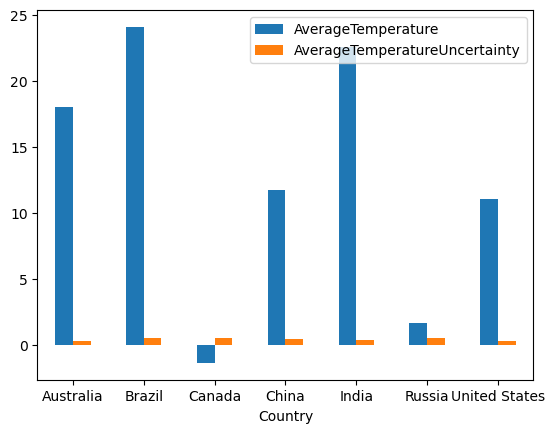

In [21]:
# Create the bar plot.
ax =world_temp_byCountry.plot.bar (rot=0)

In [51]:
world_temp_by_year = Global_temp.groupby(by='Year')[['AverageTemperature',
                                             'AverageTemperatureUncertainty']].agg(lambda x: x.astype(float).mean())
world_temp_by_year.head()

,AverageTemperature,AverageTemperatureUncertainty
Year,,
1900,9.413617,0.829057
1901,9.538776,0.788373
1902,9.076432,0.764954
1903,9.414545,0.754537
1904,9.039092,0.735660


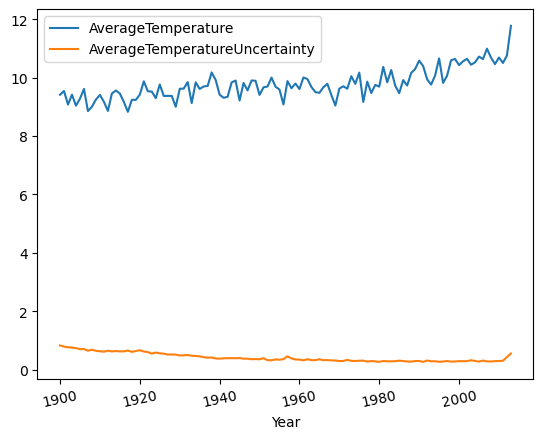

In [23]:
# Create the bar plot.
ax =world_temp_by_year.plot.line (rot=12)

## Preprocessing

In [24]:
worldtemp_df

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,25.732,1.080,Acre,Brazil,1900-01-01,1900
1,26.050,1.080,Acre,Brazil,1900-02-01,1900
2,26.574,0.894,Acre,Brazil,1900-03-01,1900
3,25.947,1.192,Acre,Brazil,1900-04-01,1900
4,25.557,0.856,Acre,Brazil,1900-05-01,1900
...,...,...,...,...,...,...
328779,15.710,0.461,Zhejiang,China,2013-04-01,2013
328780,21.634,0.578,Zhejiang,China,2013-05-01,2013
328781,24.679,0.596,Zhejiang,China,2013-06-01,2013
328782,29.272,1.340,Zhejiang,China,2013-07-01,2013


In [25]:
# Find Average temp
worldtemp_df_avg_temp = worldtemp_df["AverageTemperature"].mean()
worldtemp_df_avg_temp

9.767931197990121

In [26]:
#Adding a new column where 1 is above avg temp values and 0 below avg temp values
worldtemp_df['Above Avg Temp']= worldtemp_df['AverageTemperature'].apply(lambda x: '1' if x >= worldtemp_df['AverageTemperature'].mean() else '0')
                
worldtemp_df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year,Above Avg Temp
0,25.732,1.080,Acre,Brazil,1900-01-01,1900,1
1,26.050,1.080,Acre,Brazil,1900-02-01,1900,1
2,26.574,0.894,Acre,Brazil,1900-03-01,1900,1
3,25.947,1.192,Acre,Brazil,1900-04-01,1900,1
4,25.557,0.856,Acre,Brazil,1900-05-01,1900,1


In [31]:
#  Remove all the non numeric value columns
ml_df= worldtemp_df[['Above Avg Temp','AverageTemperatureUncertainty','Country','State', 'Year']]

ml_df.head()

,Above Avg Temp,AverageTemperatureUncertainty,Country,State,Year
0,1,1.080,Brazil,Acre,1900
1,1,1.080,Brazil,Acre,1900
2,1,0.894,Brazil,Acre,1900
3,1,1.192,Brazil,Acre,1900
4,1,0.856,Brazil,Acre,1900


In [32]:
wTemp_df = ml_df.copy()

In [33]:
#Transforming the column 'State' from text to numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

wTemp_df['State'] = le.fit_transform(wTemp_df['State'])
wTemp_df.head()

,Above Avg Temp,AverageTemperatureUncertainty,Country,State,Year
0,1,1.080,Brazil,0,1900
1,1,1.080,Brazil,0,1900
2,1,0.894,Brazil,0,1900
3,1,1.192,Brazil,0,1900
4,1,0.856,Brazil,0,1900


In [34]:
#Transforming the column 'Country' from text to numerical value
le = LabelEncoder()

wTemp_df['Country'] = le.fit_transform(wTemp_df['Country'])
wTemp_df.head()

,Above Avg Temp,AverageTemperatureUncertainty,Country,State,Year
0,1,1.080,1,0,1900
1,1,1.080,1,0,1900
2,1,0.894,1,0,1900
3,1,1.192,1,0,1900
4,1,0.856,1,0,1900


## Split the Data into Training and Testing

In [35]:
# Create our features
X = wTemp_df.drop(columns="Above Avg Temp", axis=1)


# Create our target
y = wTemp_df["Above Avg Temp"]

In [36]:
X.describe()

,AverageTemperatureUncertainty,Country,State,Year
count,328784.000000,328784.000000,328784.000000,328784.000000
mean,0.417751,4.232554,120.001116,1956.344652
std,0.319615,1.618137,69.569404,32.819143
min,0.036000,0.000000,0.000000,1900.000000
25%,0.238000,3.000000,60.000000,1928.000000
50%,0.330000,5.000000,120.000000,1956.000000
75%,0.486000,5.000000,180.000000,1985.000000
max,7.638000,6.000000,240.000000,2013.000000


In [37]:
# Check the balance of our target values
y.value_counts()

1    184179
0    144605
Name: Above Avg Temp, dtype: int64

In [38]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(246588, 4)

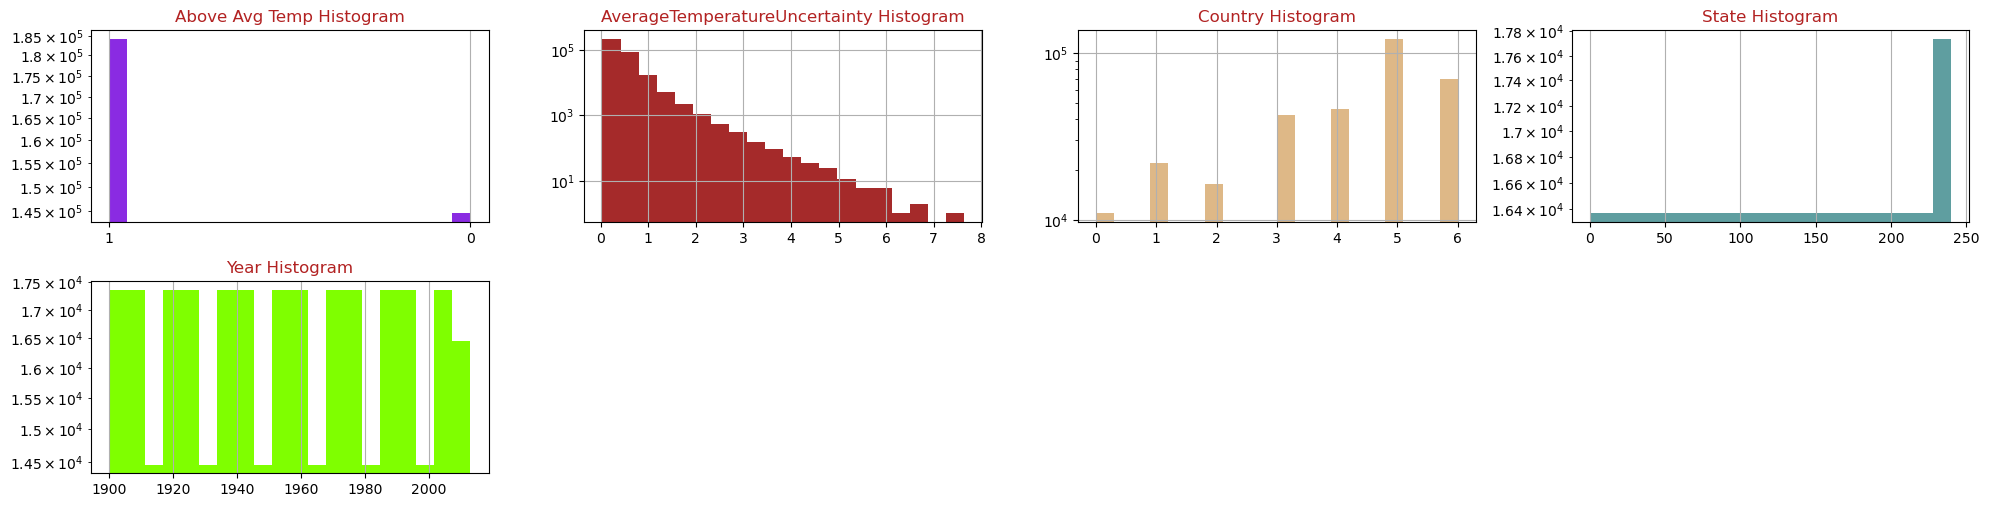

In [39]:
#Visualize the features histogram
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(wTemp_df,wTemp_df.columns,8,4)

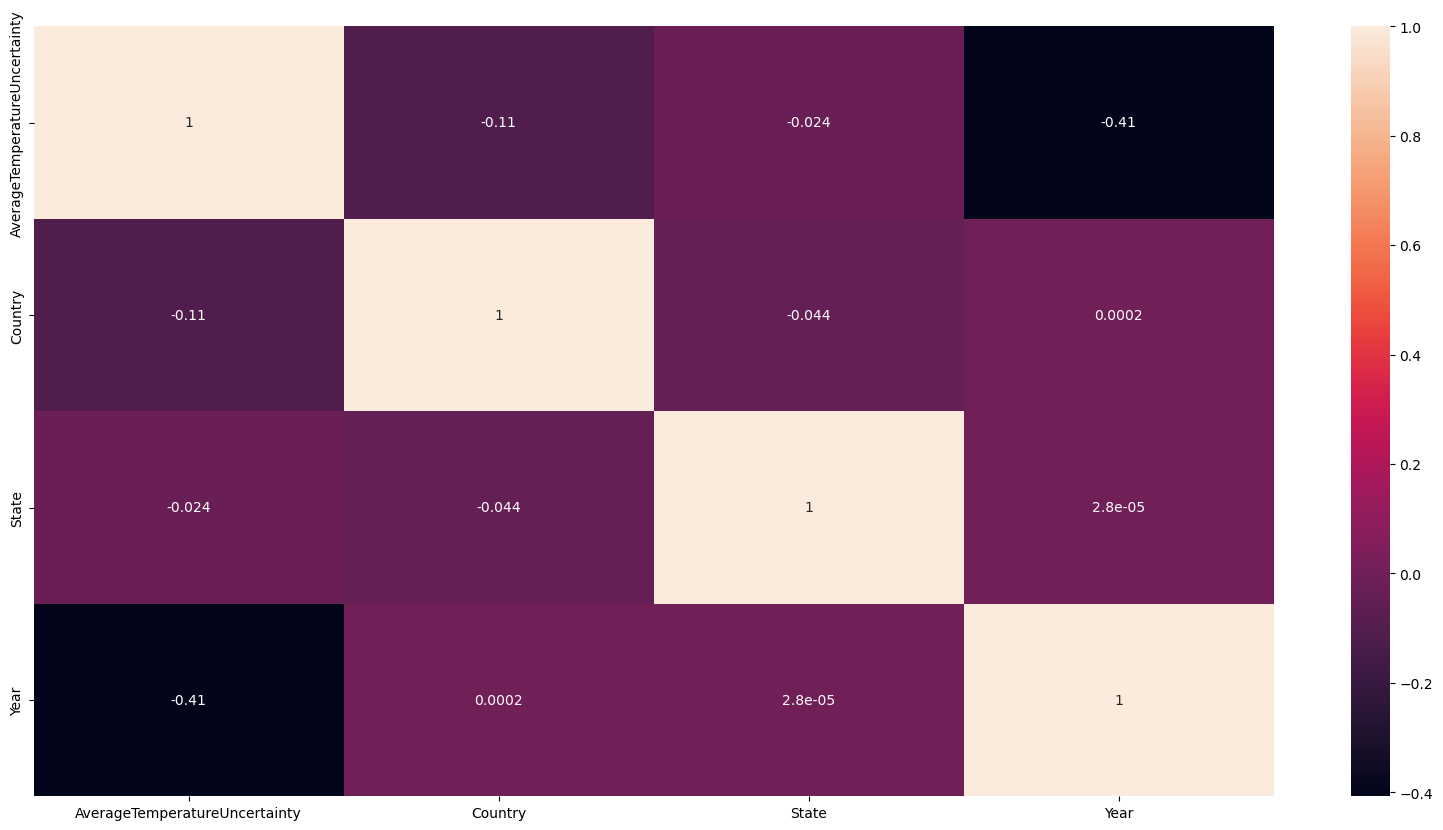

In [40]:
#Observe the dependency of variables on each other by studying their correlation
plt.figure(figsize = (20,10))
sns.heatmap(wTemp_df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

## Create a Random Forest model

In [41]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [42]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [43]:
# Making predictions using the testing data.
y_pred = rf_model.predict(X_test)

In [44]:
# Calculated the balanced accuracy score
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 71.01927101075478


In [45]:
# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.70      0.68     36151
           1       0.75      0.72      0.73     46045

    accuracy                           0.71     82196
   macro avg       0.71      0.71      0.71     82196
weighted avg       0.71      0.71      0.71     82196



In [46]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[25373 10778]
 [13043 33002]]


In [47]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df
# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

In [48]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,25373,10778
Actual 1,13043,33002


Accuracy Score : 0.7101927101075478
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.70      0.68     36151
           1       0.75      0.72      0.73     46045

    accuracy                           0.71     82196
   macro avg       0.71      0.71      0.71     82196
weighted avg       0.71      0.71      0.71     82196



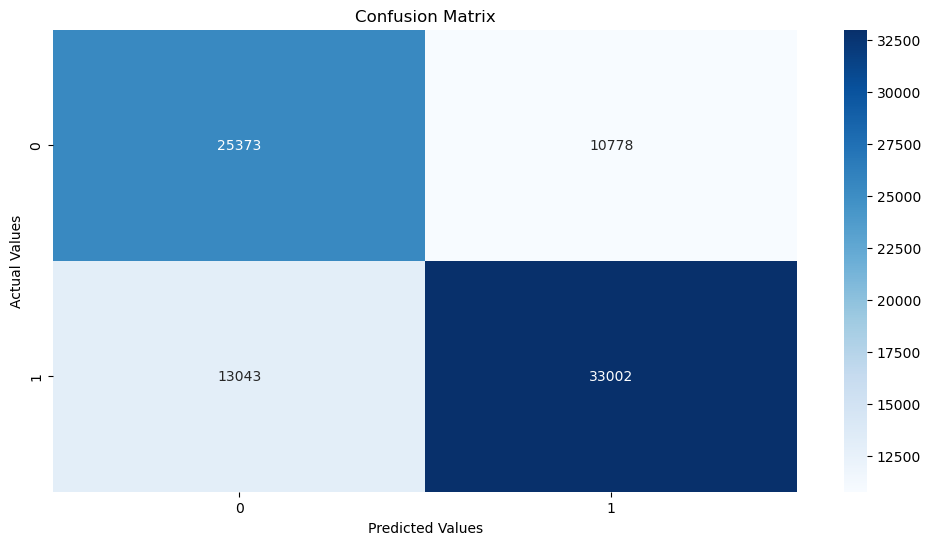

In [49]:
# Display the confusion matrix graph
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [50]:
# List the features sorted in descending order by feature importance
features = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
for feature in features:
    print(f"{feature[1]}: ({feature[0]})")

AverageTemperatureUncertainty: (0.36085115372033477)
Year: (0.21958864244658743)
Country: (0.20989706071406417)
State: (0.20966314311901363)
